# EXPLORATION_2: Iris의 세 가지 품종, 분류해볼 수 있겠어요?

In [1]:
# datasets 불러오기

from sklearn.datasets import load_iris

iris = load_iris()

# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함
print(type(dir(iris)))

<class 'list'>


In [2]:
# 메서드 확인

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris_data = iris.data # iris.method 로 해당 메소드를 불러올 수 있다.

# shape는 배열의 형상 정보를 출력
print(iris_data.shape)

(150, 4)


In [4]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

In [5]:
# 머신러닝이 출력해야 하는 모델의 정답 label 또는 target 이라고 한다.

iris_label = iris.target

print(iris_label.shape)

(150,)


In [6]:
# 각 label의 이름

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# 데이터셋에 대한 설명

# print(iris.DESCR)

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
# datasets의 저장된 경로

iris.filename

'/home/ssac10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [10]:
# pandas 불러오기

import pandas as pd

print(pd.__version__)

1.1.5


In [11]:
# DataFreame 자료형으로 변환하기

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"] = iris.target

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# train_test_split 함수를 이용하여 train set과 test set으로 나누기

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_data,
                                                    iris_label,
                                                    test_size=0.2,
                                                    random_state=7)

print(f'x_train 개수: {len(x_train)}, x_test 개수: {len(x_test)}')

x_train 개수: 120, x_test 개수: 30


In [13]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [14]:
x_test.shape, y_test.shape

((30, 4), (30,))

In [15]:
# Decision Tree 사용하기

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


In [16]:
# 모델 학습시키기

decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=32)

In [17]:
# 모델 평가하기

y_pred = decision_tree.predict(x_test)
y_pred # 예측 결과

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [18]:
y_test # 실제 test label

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [19]:
# metrics 이용하여 정확도 판단

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

In [20]:
# MNIST dataset 가져오기

from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [21]:
digits_data = digits.data
digits_data.shape

(1797, 64)

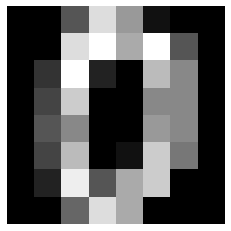

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap="gray")
plt.axis('off')
plt.show()

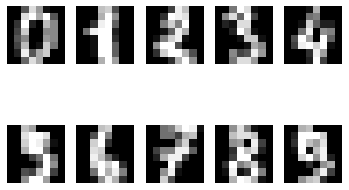

In [23]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [24]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

In [26]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# (3) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



In [27]:
# 데이터의 불균형으로 인한 정확도의 오류

fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

# 아무런 모델을 사용하지 않고 답을 0으로만 찍어도 정답률이 90%

0.9055555555555556

In [28]:
# 오차 행렬을 이용하여 TP TN FP FN 를 표시

from sklearn.metrics import confusion_matrix

# 실제 예측 결과
confusion_matrix(y_test, y_pred)

array([[317,   9],
       [  4,  30]])

In [29]:
# 가짜 예측 결과

confusion_matrix(y_test, fake_pred)

array([[326,   0],
       [ 34,   0]])

In [30]:
# classification_report를 이용하여 각 지표를 한 번에 확인

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



In [31]:
# fake_pred 에 대한 pricision 과 recall 은 0으로 3은 단 하나도 맞추지 못함

print(classification_report(y_test, fake_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       326
           3       0.00      0.00      0.00        34

    accuracy                           0.91       360
   macro avg       0.45      0.50      0.48       360
weighted avg       0.82      0.91      0.86       360



/home/ssac10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9638888888888889, 0.9055555555555556)

In [33]:
from sklearn.datasets import load_wine

wines = load_wine()
wine_data = wines.data
wine_feature = wines.feature_names
wine_target = wines.target_names
print(wine_target)

['class_0' 'class_1' 'class_2']
